In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [3]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
    

(446, 640, 3)


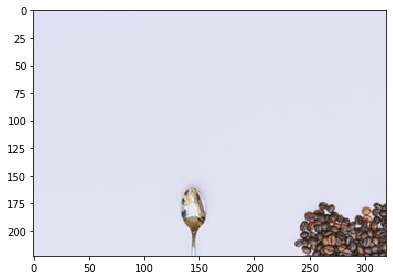

In [8]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
coffee=io.imread("coffee.jpeg")
io.imshow(coffee)
io.imshow(coffee[0:int(coffee.shape[0]/2),0:int(coffee.shape[1]/2),:])

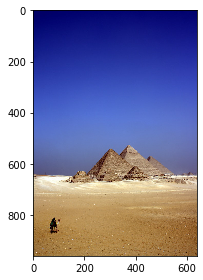

In [9]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



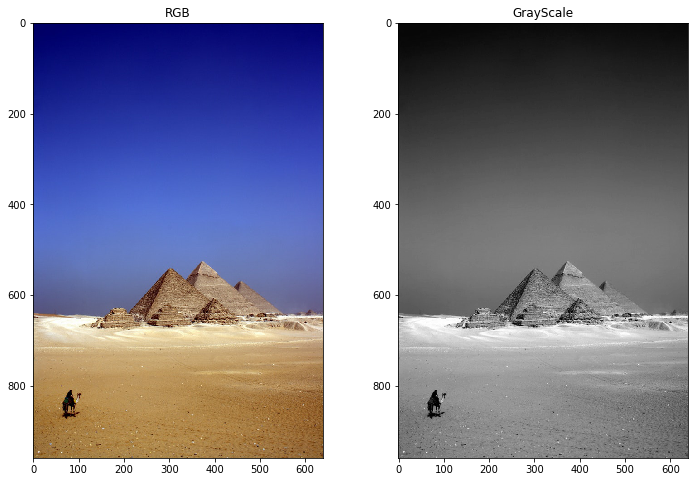

/Users/marawan/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/marawan/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


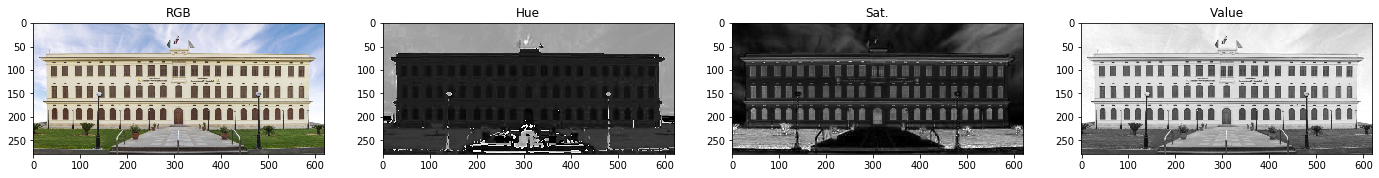

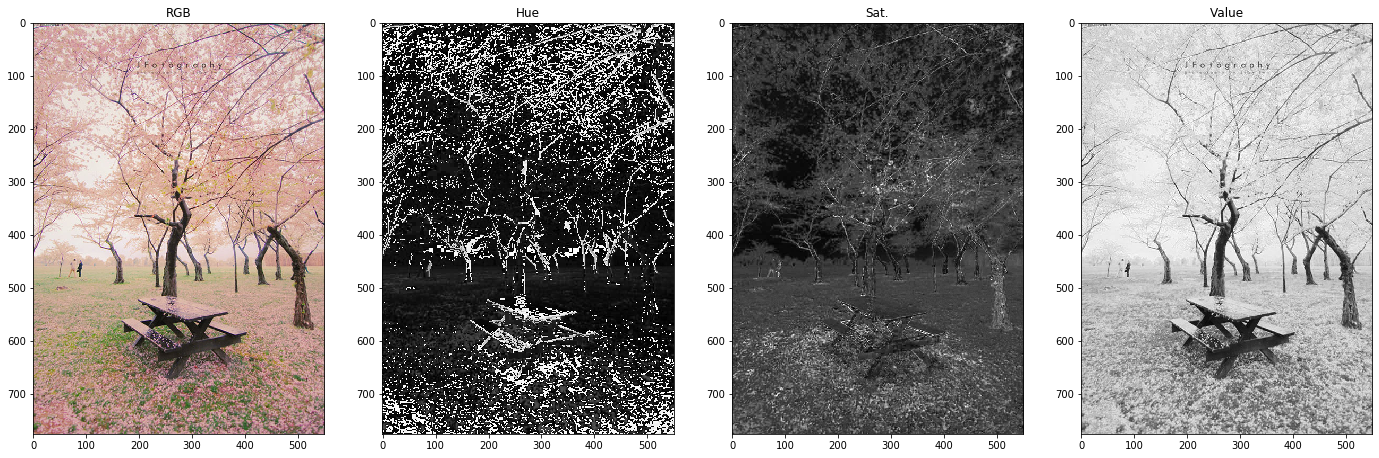

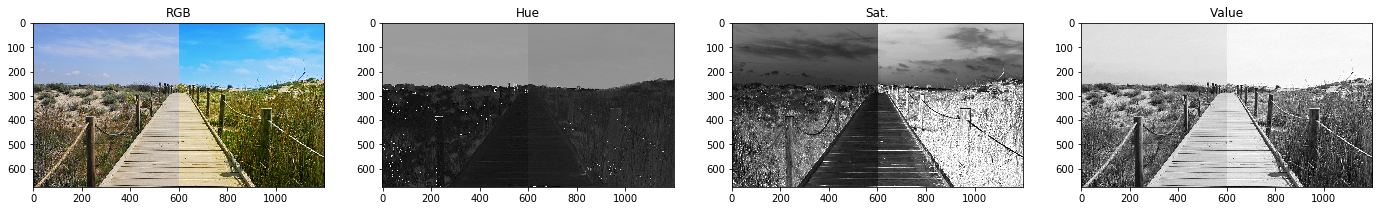

In [8]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
'''
def gray_image(img):
            grayimage=rgb2gray(img)
            show_images([img,grayimage],['RGB','GrayScale'])
            return
        
pyramids = io.imread('pyramids.jpeg')
gray_image(pyramids)



'''  
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

def HSV_image(img):
            hsvimg=rgb2hsv(img)
            show_images([img,hsvimg[:,:,0],hsvimg[:,:,1],hsvimg[:,:,2]],['RGB','Hue','Sat.','Value'])
            return
        
hsvEx1 = io.imread('./hsv/ex1.png')
hsvEx2 = io.imread('./hsv/ex2.jpg')
hsvEx3 = io.imread('./hsv/ex3.jpg')
HSV_image(hsvEx1)  # the hue in all examples is highlighting the edge because it  refers to the attribute of a visible light due to which it is differentiated from or similar to the primary colors
HSV_image(hsvEx2)  # the saturation of the picture is low cause it is vividly coloured,hence value is approaching 1 as it is so bright
HSV_image(hsvEx3)  # value of the right side is more than the left  cause r is more bright, the amount of grey(sat) in the left is less than in the right

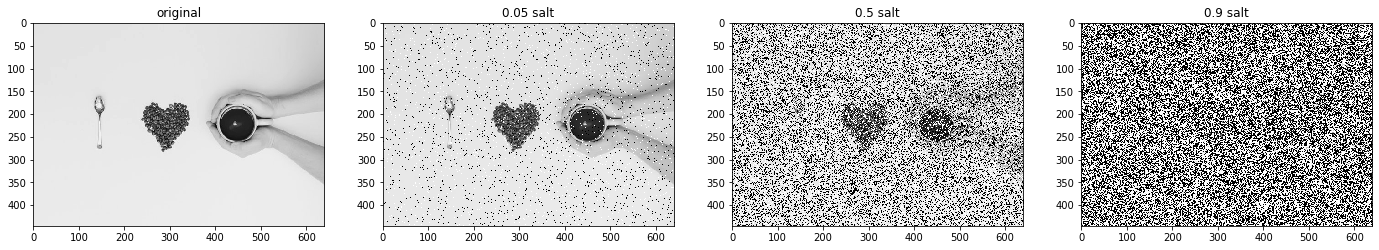

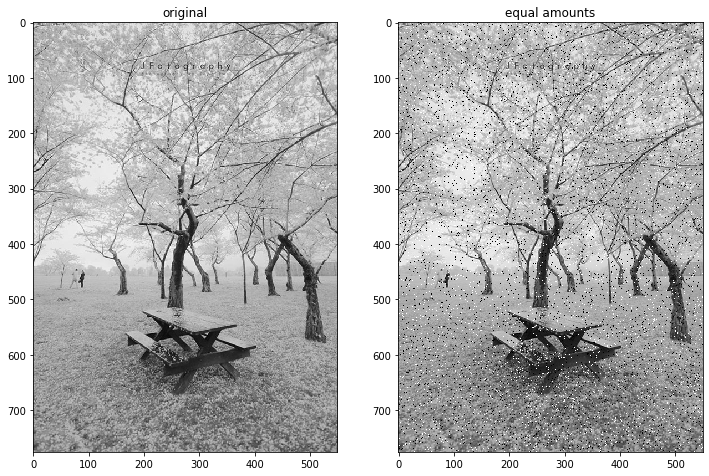

In [12]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
Proportion of salt vs. pepper noise for ‘s&p’ on range [0, 1]. Higher values represent more salt. Default : 0.5 (equal amounts)
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''

coffee=io.imread('coffee.jpeg')
coffeegray=rgb2gray(coffee)
noiselow=random_noise(coffeegray,mode='s&p',amount=0.05)  #background changes cause low salt 
noisemedium=random_noise(coffeegray,mode='s&p',amount=0.5)
noisehigh=random_noise(coffeegray,mode='s&p',amount=0.9) #coffee changes cause more salt(white low value
show_images([coffeegray,noiselow,noisemedium,noisehigh],['original','0.05 salt','0.5 salt', '0.9 salt'])

#an image with a scattered  white and black colors all over will yield lower noise as  a binary image with scatterd white and black pixels is a perfect suit
image=io.imread('./hsv/ex2.jpg') # or ex3
imagegray=rgb2gray(image)
imageafternoise=random_noise(imagegray,mode='s&p')
show_images([imagegray,imageafternoise],['original','equal amounts'])





'\n** 2- Draw a grey-scale image that has uniform histogram \nsame number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.\nuse np.ones to draw image with ones.\n'

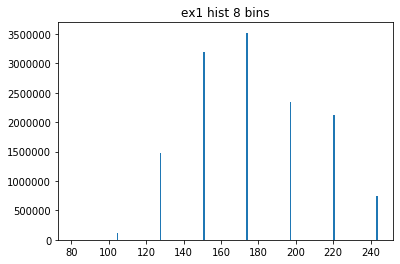

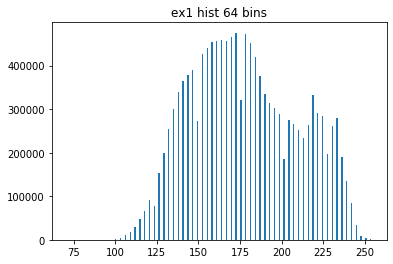

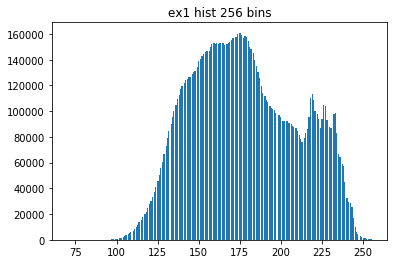

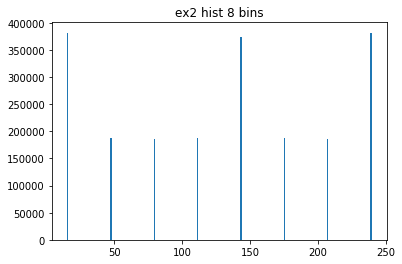

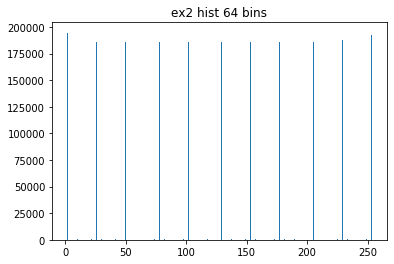

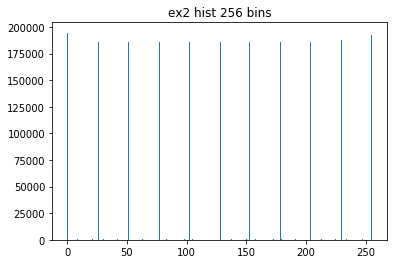

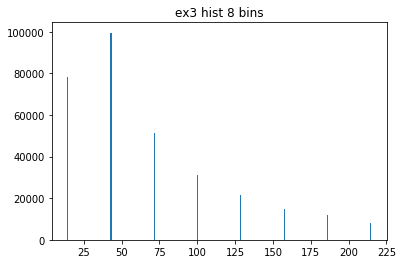

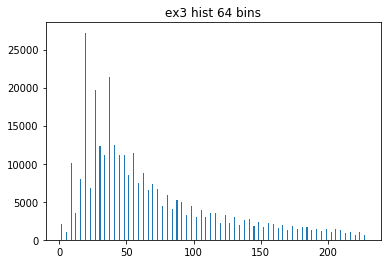

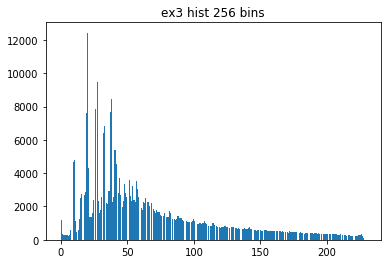

In [13]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
    Number of bins used to calculate histogram.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
'''

ex1=io.imread('./histogram/ex1.jpg')
ex2=io.imread('./histogram/ex2.png')
ex3=io.imread('./histogram/ex3.png')

gex1=rgb2gray(ex1)
gex2=rgb2gray(ex2)
gex3=rgb2gray(ex3)

hist18=histogram(gex1,nbins=8)
hist164=histogram(gex1,nbins=64)
hist1256=histogram(gex1,nbins=256)

hist28=histogram(gex2,nbins=8)
hist264=histogram(gex2,nbins=64)
hist2256=histogram(gex2,nbins=256)

hist38=histogram(gex3,nbins=8)
hist364=histogram(gex3,nbins=64)
hist3256=histogram(gex3,nbins=256)

showHist(gex1,hist18)
plt.title('ex1 hist 8 bins')
showHist(gex1,hist164)
plt.title('ex1 hist 64 bins')
showHist(gex1,hist1256)
plt.title('ex1 hist 256 bins')

showHist(gex2,hist28)
plt.title('ex2 hist 8 bins')
showHist(gex2,hist264)
plt.title('ex2 hist 64 bins')
showHist(gex2,hist2256)
plt.title('ex2 hist 256 bins')

showHist(gex3,hist38)
plt.title('ex3 hist 8 bins')
showHist(gex3,hist364)
plt.title('ex3 hist 64 bins')
showHist(gex3,hist3256)
plt.title('ex3 hist 256 bins')

'''
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''





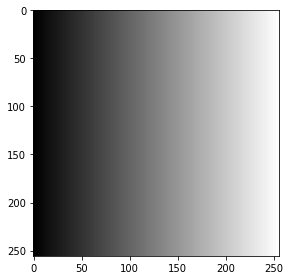

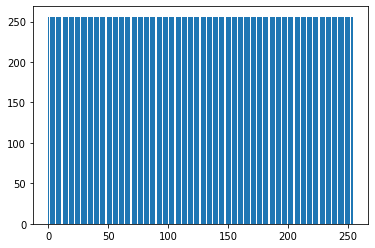

In [28]:

image=np.zeros((256,256))

for x in range(0,255) :
    image[0:256,x+1]=image[0:256,x]+(1/256)


io.imshow(image)
equalhist=histogram(image,nbins=256)
showHist(image,equalhist)

